# Fit the DDM on hierarchical data

## Import the data

In [1]:
from rlssm.utility.load_data import load_example_dataset

data = load_example_dataset(hierarchical_levels = 2)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type
0,1,1,1,43,39,2,1,1,1.244082,0,0
1,1,1,2,60,50,4,3,1,1.101821,1,0
2,1,1,3,44,36,4,2,2,1.029923,0,0
3,1,1,4,55,55,4,3,2,1.368007,0,0
4,1,1,5,52,49,4,3,3,1.039329,1,0


## Initialize the model

In [2]:
from rlssm.model.models_DDM import DDModel

model = DDModel(hierarchical_levels = 2)

## Fit

In [3]:
# sampling parameters
n_warmup = 1000
n_sampling = 3000
n_chains = 2
n_thin = 1

# bayesian model, change default priors:
drift_priors = {'mu_mu':1, 'sd_mu':1, 'mu_sd':0, 'sd_sd':1}
threshold_priors = {'mu_mu':-1, 'sd_mu':.5, 'mu_sd':0, 'sd_sd':1}

In [4]:
model_fit = model.fit(
    data,
    drift_priors=drift_priors,
    threshold_priors=threshold_priors,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains = n_chains)

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

### get Rhat

In [5]:
model_fit.rhat.describe()

,rhat
count,32492.000000
mean,0.999920
std,0.000243
min,0.999674
25%,0.999786
50%,0.999872
75%,0.999993
max,1.009405


### calculate wAIC

In [6]:
model_fit.waic

{'lppd': -5411.182250067814,
 'p_waic': 100.63196354609696,
 'waic': 11023.62842722782,
 'waic_se': 176.66466050064793}

## Posteriors

In [7]:
model_fit.samples.describe()

,transf_mu_drift,ndt_sbj[1],ndt_sbj[2],ndt_sbj[3],ndt_sbj[4],ndt_sbj[5],ndt_sbj[6],ndt_sbj[7],ndt_sbj[8],ndt_sbj[9],...,threshold_sbj[18],threshold_sbj[19],threshold_sbj[20],threshold_sbj[21],threshold_sbj[22],threshold_sbj[23],threshold_sbj[24],threshold_sbj[25],threshold_sbj[26],threshold_sbj[27]
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.903614,0.834055,0.655434,0.880659,0.697780,0.730181,0.760707,0.785532,0.755432,0.741328,...,1.695188,2.416692,2.032607,2.113249,2.064710,2.237746,1.692517,1.502668,1.522944,1.931133
std,0.058525,0.007951,0.008027,0.008411,0.011892,0.009436,0.007629,0.009225,0.017968,0.010099,...,0.050563,0.076427,0.070540,0.090275,0.082555,0.089762,0.065065,0.050911,0.046268,0.063163
min,0.644314,0.795589,0.617667,0.828714,0.640971,0.686307,0.720884,0.741855,0.651512,0.694312,...,1.521590,2.169600,1.807300,1.769340,1.792770,1.980560,1.447830,1.335650,1.366500,1.708390
25%,0.864027,0.829132,0.650440,0.875655,0.690575,0.724564,0.756241,0.779731,0.743935,0.735218,...,1.659840,2.363885,1.984888,2.051448,2.007697,2.176400,1.647547,1.468225,1.490710,1.886485
50%,0.903014,0.834704,0.656146,0.881377,0.698775,0.730982,0.761514,0.786379,0.756350,0.742443,...,1.693585,2.414625,2.030870,2.110305,2.063575,2.233610,1.691290,1.500780,1.521500,1.930255
75%,0.943146,0.839636,0.661148,0.886497,0.706304,0.736876,0.766097,0.792279,0.768193,0.748528,...,1.728695,2.466720,2.078965,2.169643,2.117173,2.296740,1.735422,1.536288,1.553675,1.973118
max,1.145460,0.857250,0.678214,0.903871,0.729880,0.754671,0.780673,0.810502,0.806700,0.768572,...,1.889270,2.710040,2.376000,2.449030,2.489520,2.591150,1.939490,1.722350,1.714380,2.192300


In [8]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

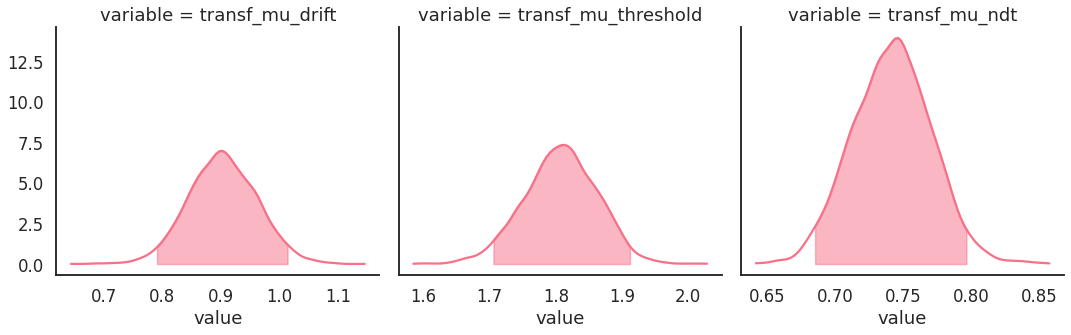

In [9]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

## Posterior predictives

### Ungrouped

In [10]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.836324,1.472888,2.012491,0.902504,1.084305,1.295443,1.558672,2.167663,0.944664,1.124416,1.308902,1.603254,2.236079
2,0.820080,1.482044,2.189477,0.854851,1.073392,1.270940,1.541261,2.305245,0.953740,1.131644,1.324341,1.616389,2.231728
3,0.818843,1.461451,1.971206,0.910193,1.089654,1.291573,1.557270,2.155531,0.939234,1.114607,1.309213,1.588999,2.215503
4,0.829672,1.462925,2.052001,0.914454,1.114654,1.294640,1.578460,2.170640,0.935519,1.120756,1.310031,1.591187,2.191603
5,0.832921,1.470473,1.923023,0.895867,1.087681,1.263260,1.542949,2.127622,0.944032,1.131648,1.315618,1.598374,2.225522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.836015,1.505057,2.018858,0.913929,1.120677,1.311724,1.623893,2.241807,0.940909,1.123996,1.323298,1.623920,2.318843
97,0.831374,1.452843,2.130462,0.904778,1.092866,1.274184,1.549612,2.214417,0.940157,1.118636,1.300172,1.573216,2.153075
98,0.834623,1.462540,1.977755,0.905216,1.084695,1.263393,1.558063,2.191796,0.939393,1.114899,1.302935,1.597298,2.217329


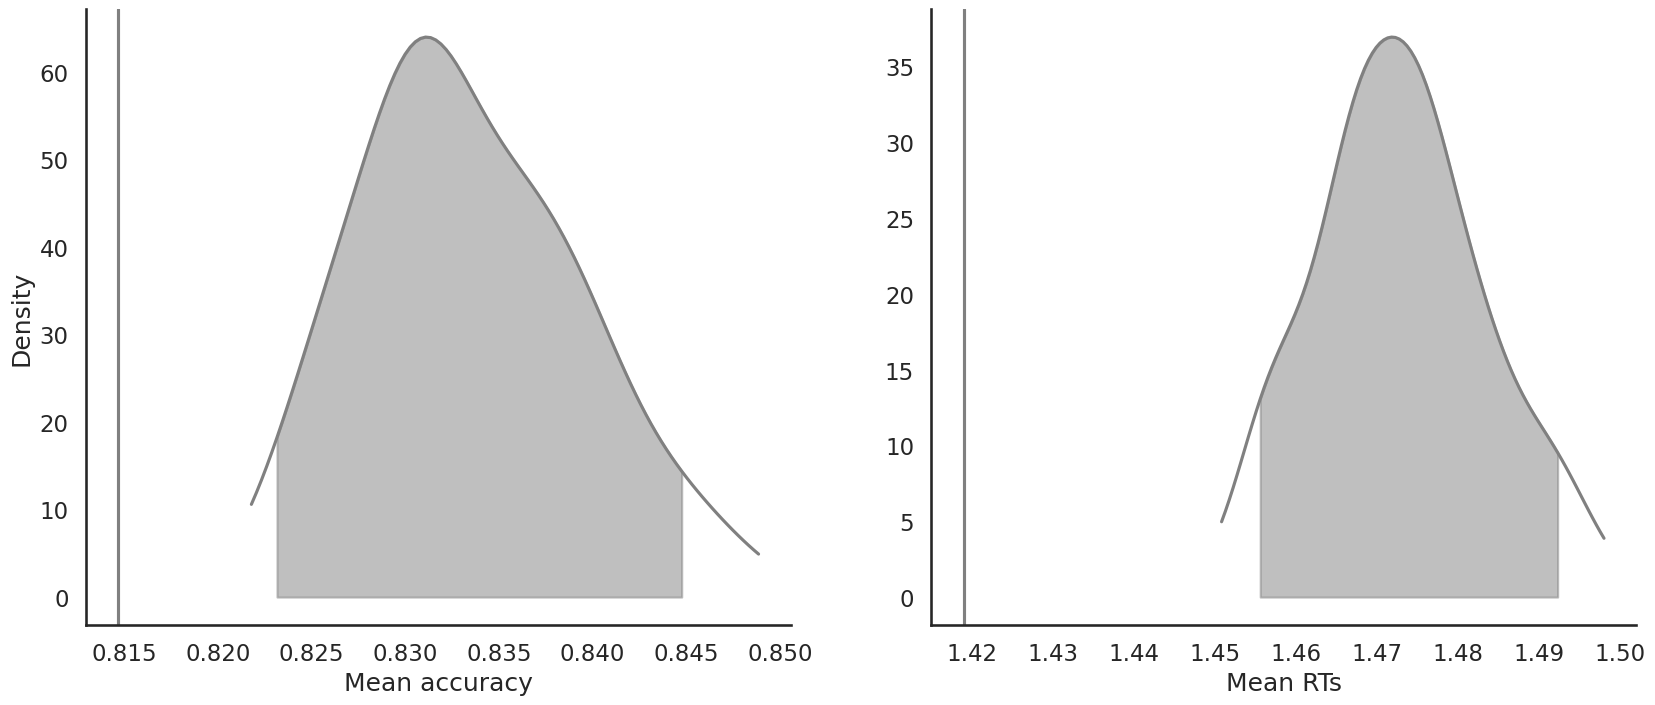

In [11]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

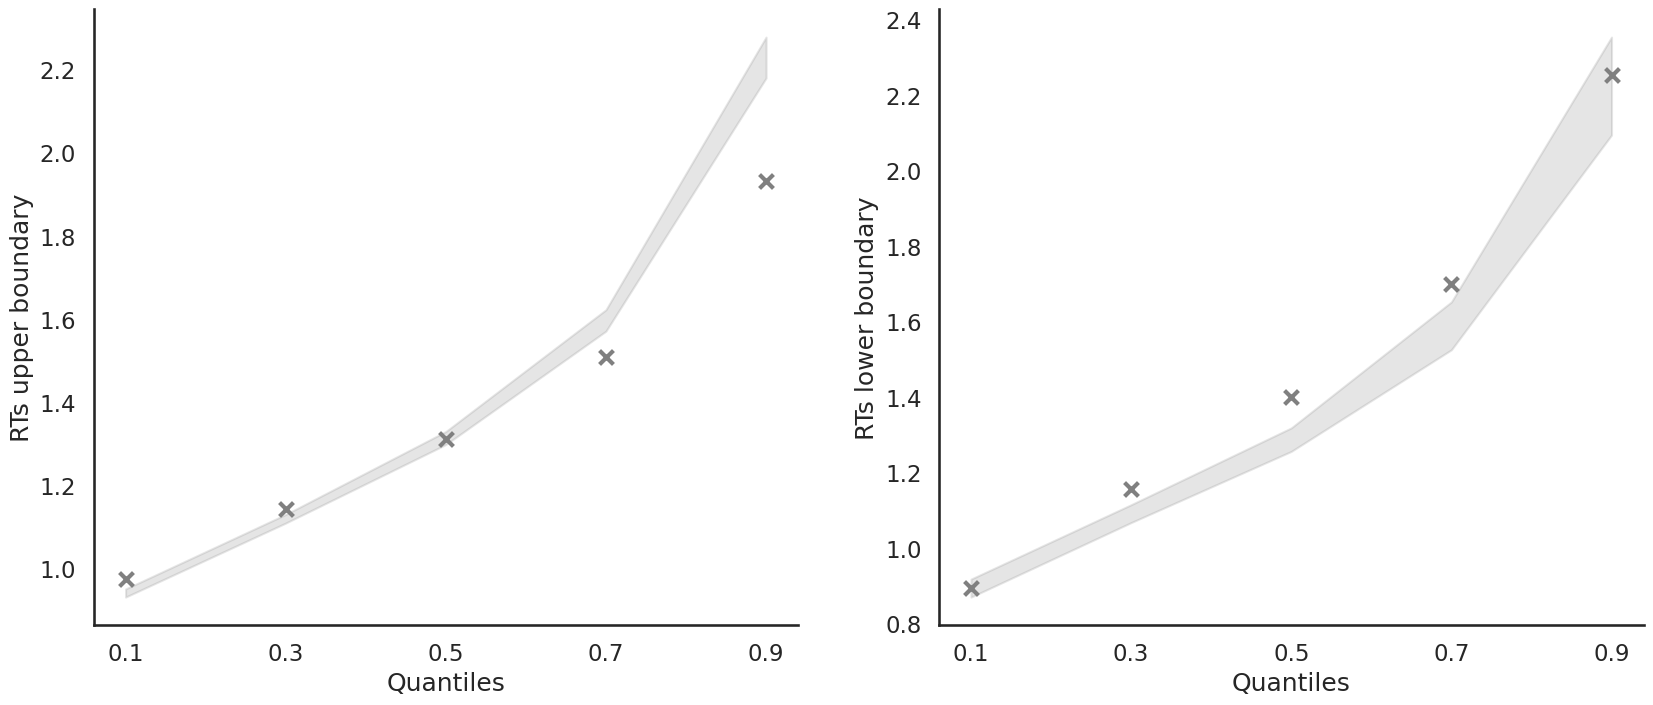

In [12]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [13]:
import numpy as np
import pandas as pd

In [14]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [15]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1            0.822761  1.471626  2.657549   
                        2            0.815642  1.442868  1.990927   
                        3            0.843575  1.472547  1.709116   
                        4            0.852886  1.461289  2.066555   
                        5            0.811918  1.473308  1.735016   
...                                       ...       ...       ...   
3           CD          96           0.853704  1.445401  1.916877   
                        97           0.820370  1.444563  1.666012   
                        98           0.844444  1.478613  1.833270   
                        99           0.822222  1.439588  2.732448   
                        100          0.842593  1.494708  1.810302   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.114174        1.121570   
                        2              1.053502        1.101756   
                        3              1.140087        1.123903   
                        4              1.122415        1.106834   
                        5              1.157361        1.135946   
...                                         ...             ...   
3           CD          96             1.108463        1.100182   
                        97             1.131134        1.115417   
                        98             1.094620        1.112042   
                        99             1.144868        1.113079   
                        100            1.095069        1.091960   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.276826        1.322826   
                        2              1.221142        1.330382   
                        3              1.387745        1.297668   
                        4              1.293683        1.303561   
                        5              1.281197        1.282840   
...                                         ...             ...   
3           CD          96             1.245880        1.297488   
                        97             1.289976        1.294463   
                        98             1.294260        1.321258   
                        99             1.347870        1.305703   
                        100            1.268813        1.299024   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1              1.510895        1.617096  
                        2              1.509963        1.586605  
                        3              1.742062        1.571095  
                        4              1.501261        1.579353  
                        5              1.594695        1.569072  
...                                         ...             ...  
3           CD          96             1.693152        1.538766  
                        97             1.480066        1.588730  
                        98             1.629506        1.616004  
                        99             1.571074        1.528491  
                        100            1.579005        1.642565  

[1200 rows x 9 columns]

In [16]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.849383  1.472770  3.000080         1.196498   
           2            0.824691  1.461632  1.741275         1.118516   
           3            0.820988  1.491323  1.791331         1.120800   
           4            0.830864  1.468017  1.857215         1.139158   
           5            0.823457  1.487185  2.194587         1.080491   
...                          ...       ...       ...              ...   
8          96           0.818640  1.509496  1.877033         1.064642   
           97           0.826196  1.487436  1.860265         1.123514   
           98           0.848866  1.436720  2.208275         1.067737   
           99           0.843829  1.433309  1.885327         1.061207   
           100          0.858942  1.461081  2.259174         1.081922   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.118431         1.379314        1.327157   
           2             1.113864         1.310326        1.288555   
           3             1.151897         1.316935        1.347935   
           4             1.108483         1.366285        1.299820   
           5             1.130753         1.277892        1.323849   
...                           ...              ...             ...   
8          96            1.112386         1.219882        1.312611   
           97            1.145594         1.302736        1.339433   
           98            1.118741         1.278684        1.311518   
           99            1.122235         1.263771        1.311101   
           100           1.124959         1.259760        1.302550   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.617146        1.584692  
           2              1.663280        1.582645  
           3              1.548980        1.619783  
           4              1.614111        1.614256  
           5              1.564566        1.634662  
...                            ...             ...  
8          96             1.571936        1.627640  
           97             1.500332        1.615293  
           98             1.537018        1.547097  
           99             1.464823        1.546171  
           100            1.461689        1.601377  

[800 rows x 9 columns]

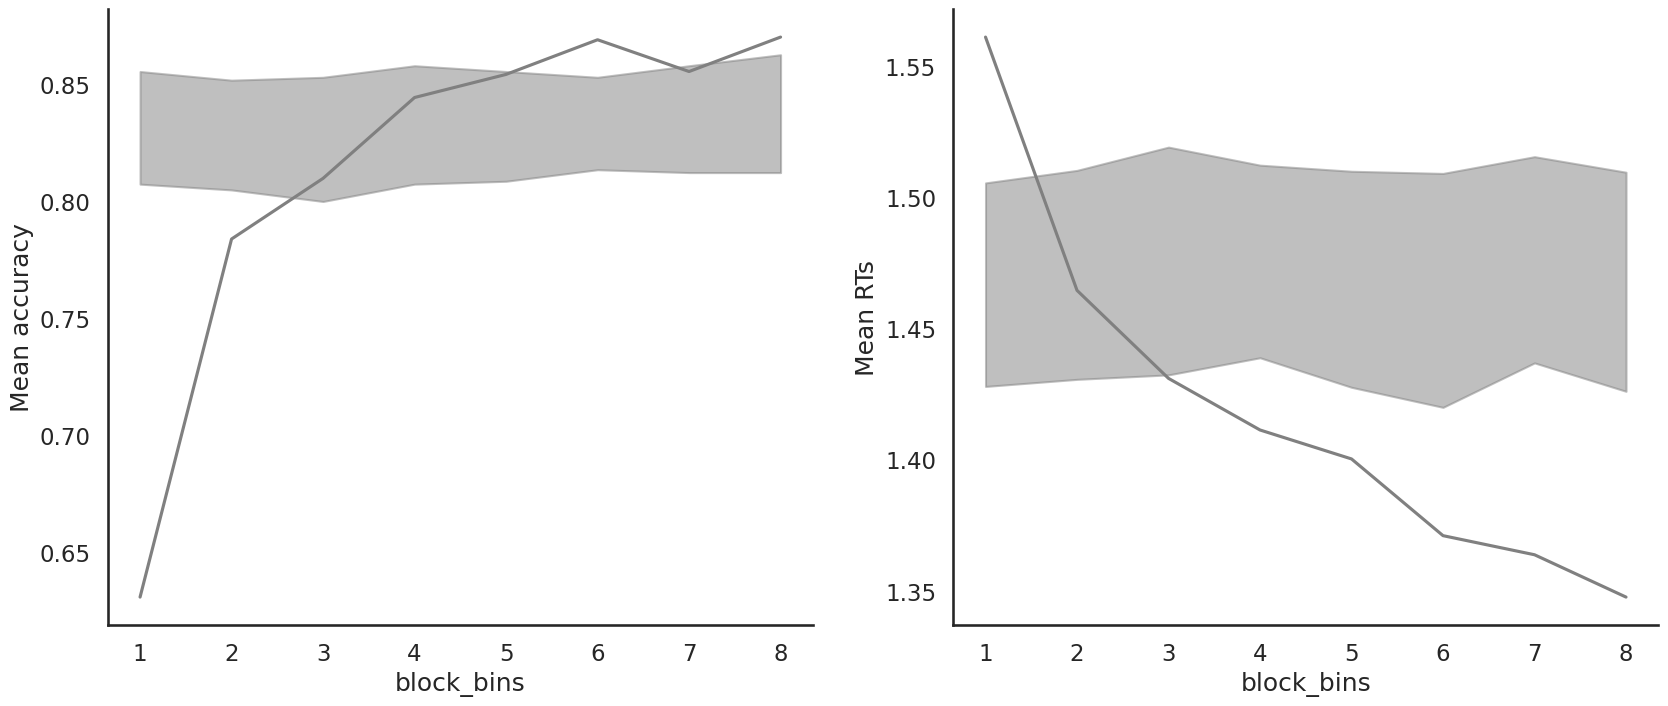

In [17]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

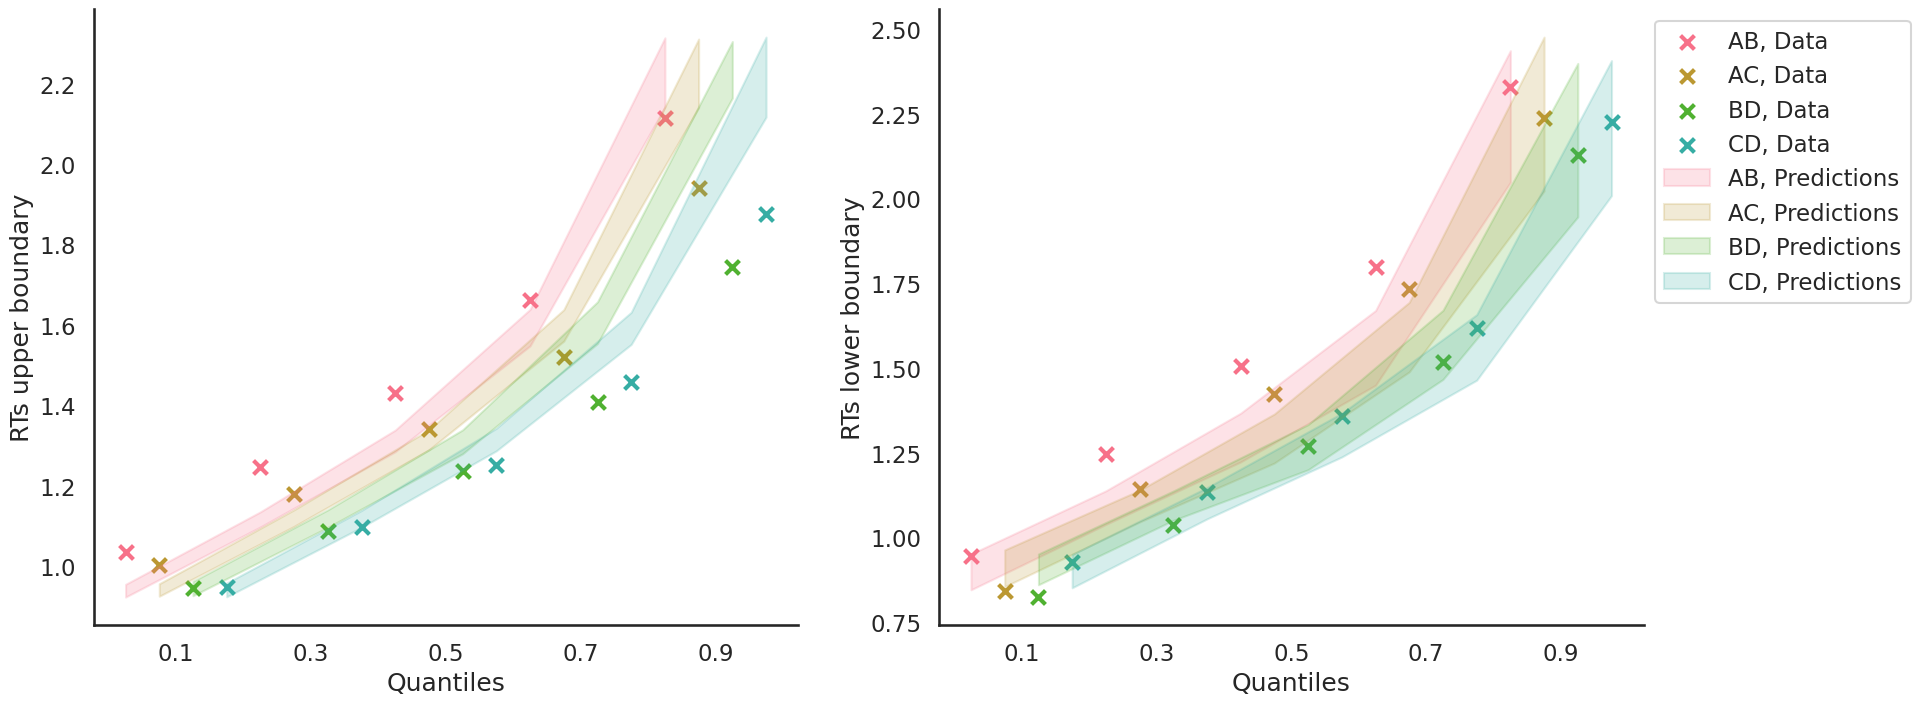

In [18]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                        grouping_var='choice_pair',
                                                        kind='shades',
                                                        quantiles=[.1, .3, .5, .7, .9]);